1. Mô phỏng quy hoạch tần số 
-	Viết chương trình Python để hiển thị sơ đồ cell với các giá trị K = 3, 7, 12. 
-	Mô phỏng cách xác định vị trí của các cell đồng kênh bằng cách sử dụng công thức 


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37308\374677056.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', K).colors  # Lấy K màu từ tab10


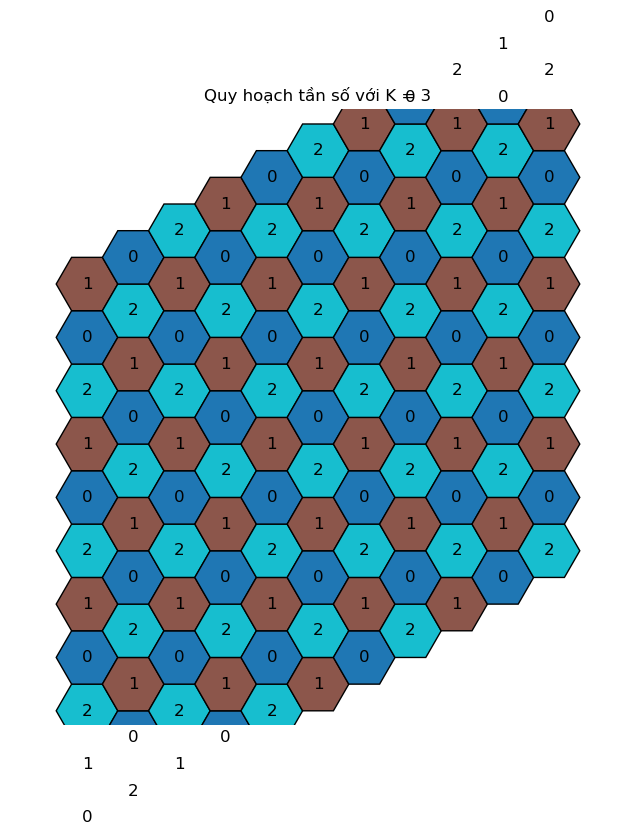

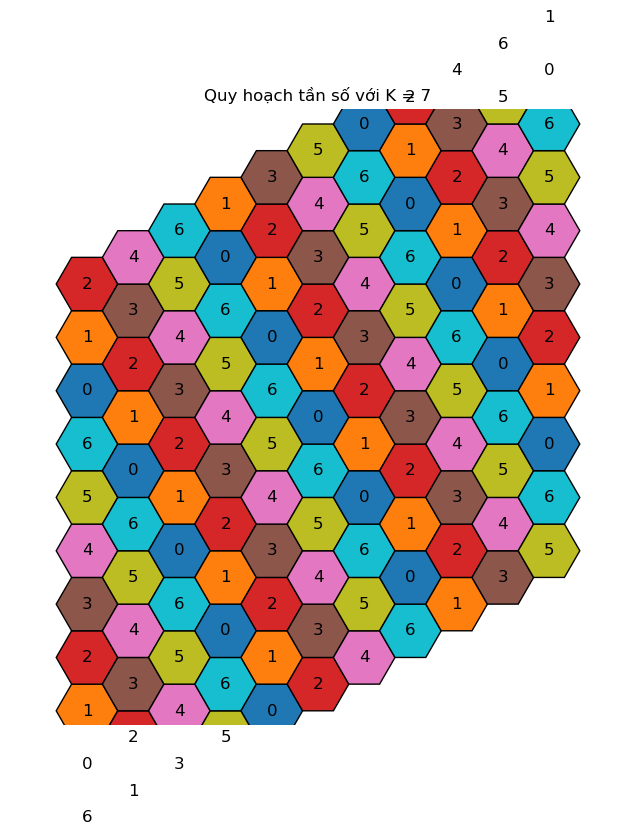

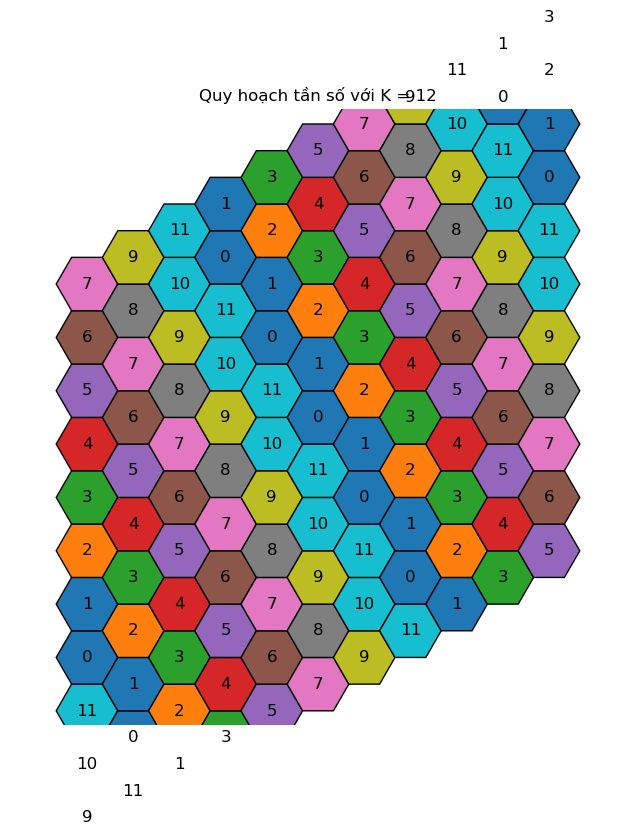

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hexagon(x, y, size, color, edgecolor='black'):
    """Vẽ một cell hình lục giác tại tọa độ (x, y) với kích thước size."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angles)
    y_hex = y + size * np.sin(angles)
    plt.fill(x_hex, y_hex, color=color, edgecolor=edgecolor)

def generate_cells(K, R=1, rows=5, cols=5):
    """Mô phỏng quy hoạch tần số với K cụm tần số."""
    plt.figure(figsize=(8, 8))
    colors = plt.cm.get_cmap('tab10', K).colors  # Lấy K màu từ tab10
    
    for i in range(-rows, rows+1):
        for j in range(-cols, cols+1):
            x = R * (3/2 * i)
            y = R * (np.sqrt(3) * (j + i / 2))
            freq_cluster = (i * 2 + j) % K  # Phân bổ tần số theo mô hình tuần hoàn
            hexagon(x, y, R, color=colors[freq_cluster % K], edgecolor='black')
            plt.text(x, y, str(freq_cluster), ha='center', va='center', fontsize=12, color='black')
    
    plt.xlim(-R * cols * 2, R * cols * 2)
    plt.ylim(-R * rows * 2, R * rows * 2)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(f"Quy hoạch tần số với K = {K}")
    plt.show()

# Hiển thị sơ đồ với các giá trị K khác nhau
for K in [3, 7, 12]:
    generate_cells(K)


2. Tính toán nhiễu đồng kênh bằng Python 
-	Viết một chương trình để tính toán mức nhiễu đồng kênh dựa trên khoảng cách tái sử dụng D. 
-	So sánh nhiễu giữa các giá trị K=7, K=12.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_37308\1321353207.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', K).colors  # Lấy K màu từ tab10


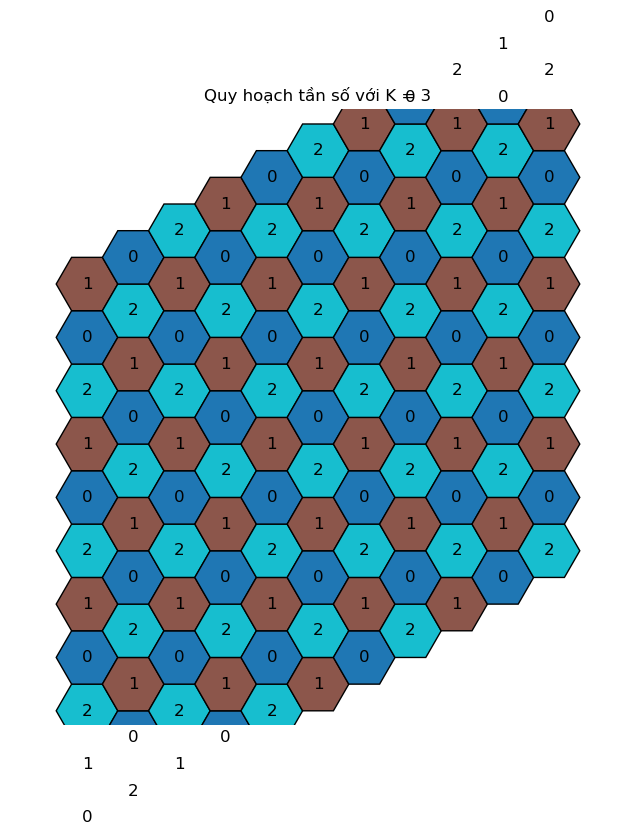

K = 3: D = 3.00, Nhiễu đồng kênh I = 0.012346


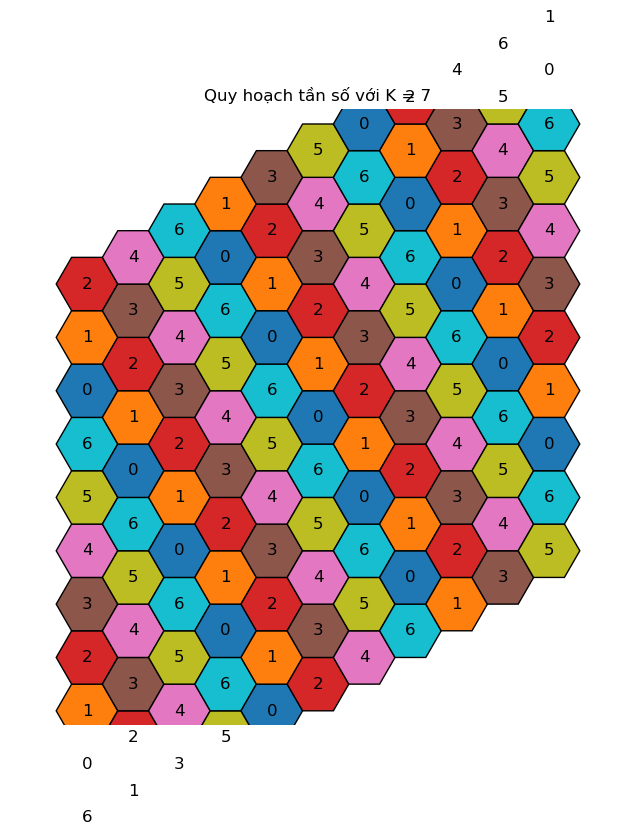

K = 7: D = 4.58, Nhiễu đồng kênh I = 0.002268


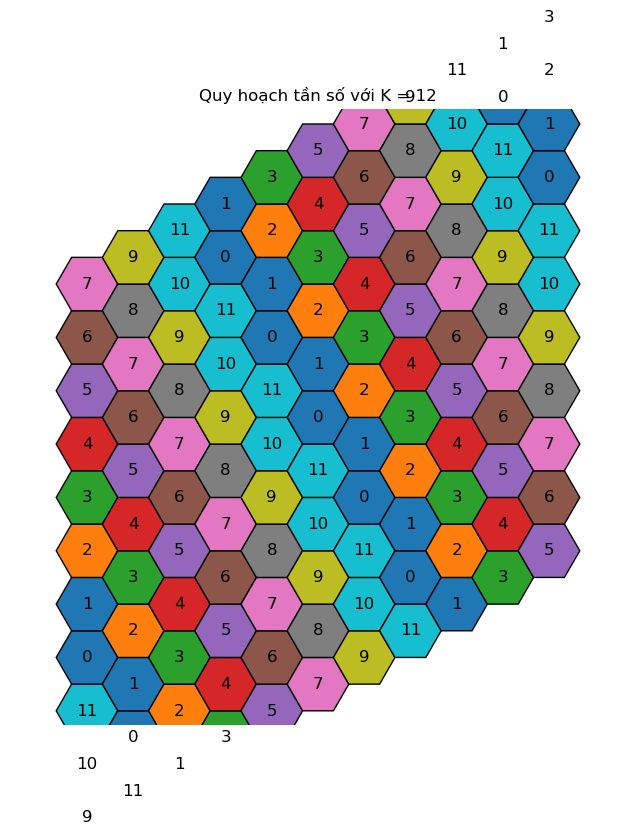

K = 12: D = 6.00, Nhiễu đồng kênh I = 0.000772


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def hexagon(x, y, size, color, edgecolor='black'):
    """Vẽ một cell hình lục giác tại tọa độ (x, y) với kích thước size."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angles)
    y_hex = y + size * np.sin(angles)
    plt.fill(x_hex, y_hex, color=color, edgecolor=edgecolor)

def generate_cells(K, R=1, rows=5, cols=5):
    """Mô phỏng quy hoạch tần số với K cụm tần số."""
    plt.figure(figsize=(8, 8))
    colors = plt.cm.get_cmap('tab10', K).colors  # Lấy K màu từ tab10
    
    for i in range(-rows, rows+1):
        for j in range(-cols, cols+1):
            x = R * (3/2 * i)
            y = R * (np.sqrt(3) * (j + i / 2))
            freq_cluster = (i * 2 + j) % K  # Phân bổ tần số theo mô hình tuần hoàn
            hexagon(x, y, R, color=colors[freq_cluster % K], edgecolor='black')
            plt.text(x, y, str(freq_cluster), ha='center', va='center', fontsize=12, color='black')
    
    plt.xlim(-R * cols * 2, R * cols * 2)
    plt.ylim(-R * rows * 2, R * rows * 2)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(f"Quy hoạch tần số với K = {K}")
    plt.show()

def co_channel_interference(K):
    """Tính toán nhiễu đồng kênh dựa trên khoảng cách tái sử dụng D."""
    N = K  # Số cụm tần số
    D = np.sqrt(3 * N)  # Khoảng cách tái sử dụng
    I = (1 / D) ** 4  # Mô hình nhiễu (tỷ lệ nghịch với D^4)
    return D, I

# Hiển thị sơ đồ với các giá trị K khác nhau
for K in [3, 7, 12]:
    generate_cells(K)
    D, I = co_channel_interference(K)
    print(f"K = {K}: D = {D:.2f}, Nhiễu đồng kênh I = {I:.6f}")
